# Импортируем необходимые библиотеки

In [16]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# Загружаем набор данных

In [17]:
data = pd.read_csv("Language Detection.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Смотрим количество текстов на каждом языке

In [18]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

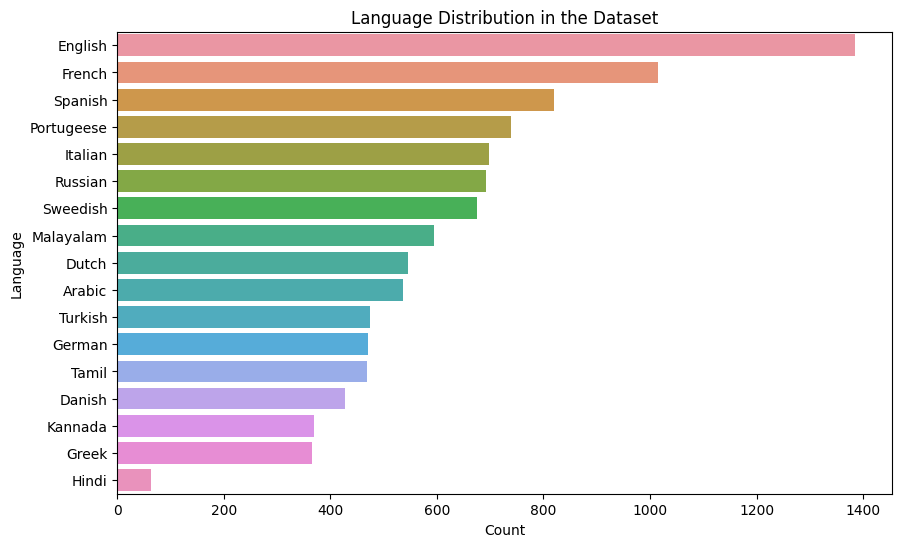

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Language', data=data, order = data['Language'].value_counts().index)
plt.title('Language Distribution in the Dataset')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

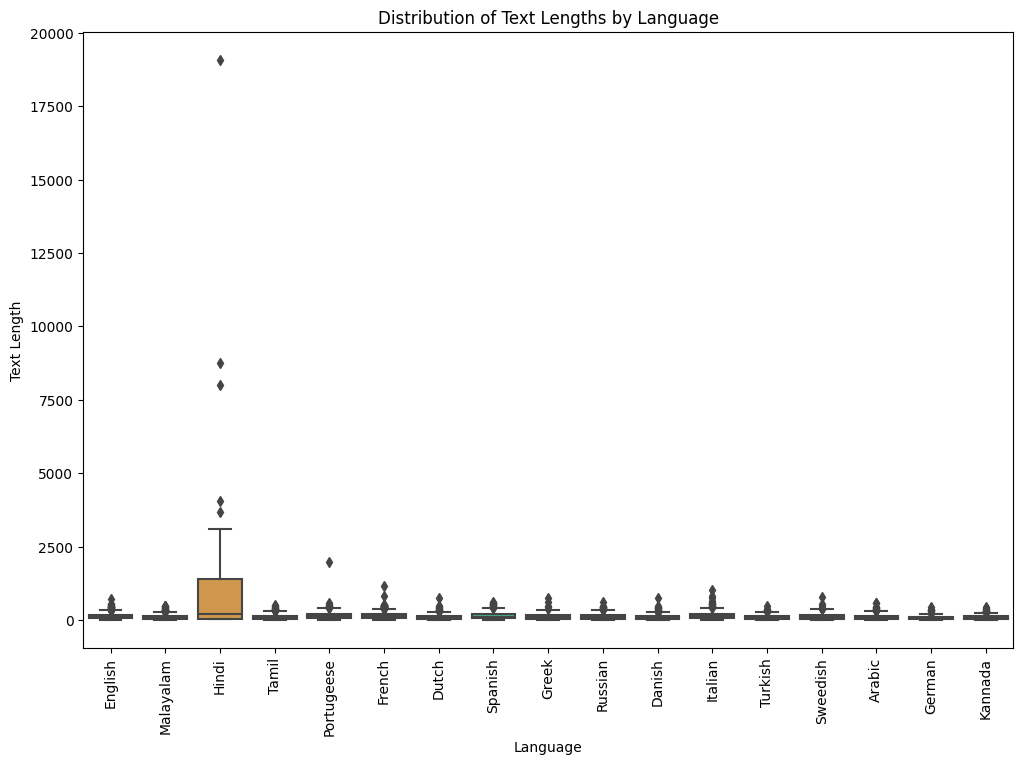

In [20]:
data['Text Length'] = data['Text'].apply(len)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Language', y='Text Length', data=data)
plt.xticks(rotation=90)
plt.title('Distribution of Text Lengths by Language')
plt.xlabel('Language')
plt.ylabel('Text Length')
plt.show()

# Разделяем признаки и целевую переменную

In [21]:
X = data["Text"]
y = data["Language"]

# Преобразуем категориальные переменные в числовые

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Создаем список для добавления предобработанных текстов

In [23]:
data_list = []

# Итерируем по всем текстам

In [24]:
for text in X:
    # Удаляем символы и цифры
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    # Приводим текст к нижнему регистру
    text = text.lower()
    # Добавляем в список
    data_list.append(text)

# Создаем мешок слов с помощью CountVectorizer

In [25]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

# Делим данные на обучающую и тестовую выборки

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.03)

# Создаем и обучаем модель с помощью MultinomialNB

In [27]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

# Делаем предсказания на тестовой выборке


In [28]:
y_pred = model.predict(x_test)

# Оцениваем модель с помощью accuracy_score и confusion_matrix

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Визуализируем матрицу ошибок

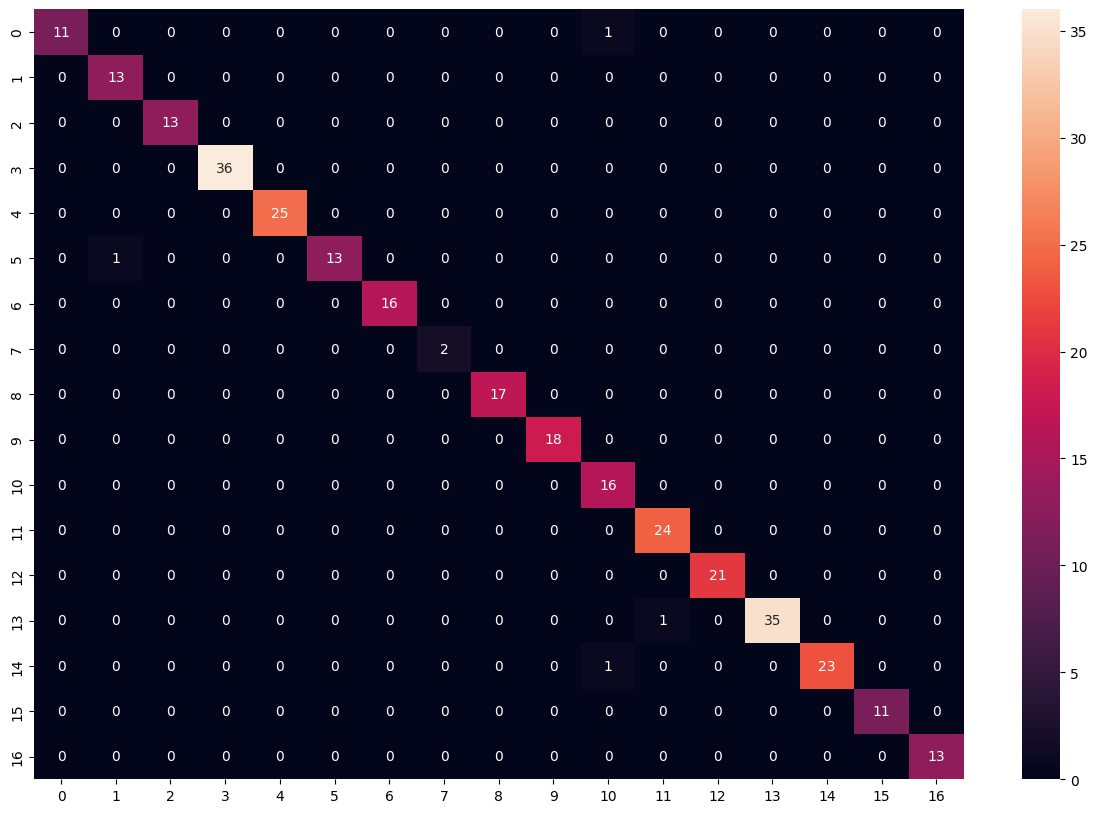

In [30]:
plt.figure(figsize= (15,10))
sns.heatmap(cm, annot = True)
plt.show()

# Функция для предсказания языка текста

In [31]:
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The langauge is in",lang)

In [32]:
predict("Hi my name is dastan")
predict("Привет меня зовут дастан")
predict("Merhaba benim adım destan")
predict("Hallo mein Name ist dastan")
predict("مرحبا اسمي داستان")

The langauge is in ['English']
The langauge is in ['Russian']
The langauge is in ['Turkish']
The langauge is in ['German']
The langauge is in ['Arabic']


In [33]:
import joblib

# Assuming 'model' is your RandomForestClassifier and 'cv' is CountVectorizer
joblib.dump(model, 'language_detection_model.pkl')
joblib.dump(cv, 'count_vectorizer.pkl')

['count_vectorizer.pkl']

In [34]:
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']